In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
X_train = np.linspace(-1, 1, 20)

In [34]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [35]:
X_test = np.linspace(-1, 1, 20)

In [36]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

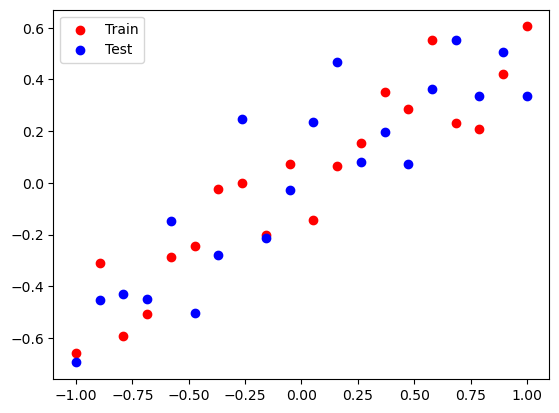

In [37]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test,  c='blue' , label='Test')
plt.legend()
plt.show()

### Regression model

In [38]:
model1 = Sequential()

model1.add(Dense(128, input_dim=1, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model1.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

d:\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
_, train_mse = model1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model1.evaluate(X_test, y_test, verbose=0)

print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0030899732373654842, Test: 0.04569770023226738


In [40]:
y_pred1 = model1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


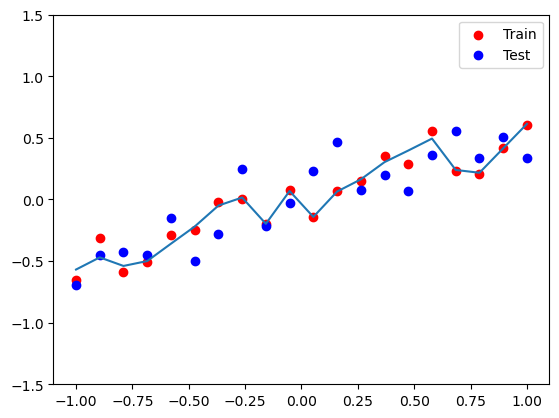

In [41]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

#### DropOu2t

In [42]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=1))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)
model2.compile(loss='mse', optimizer=adam, metrics=['mse'])
dropout_history = model2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [44]:
_, train_mse = model2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model2.evaluate(X_test, y_test, verbose=0)

print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.012357770465314388, Test: 0.03819812834262848


In [46]:
y_pred_2 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


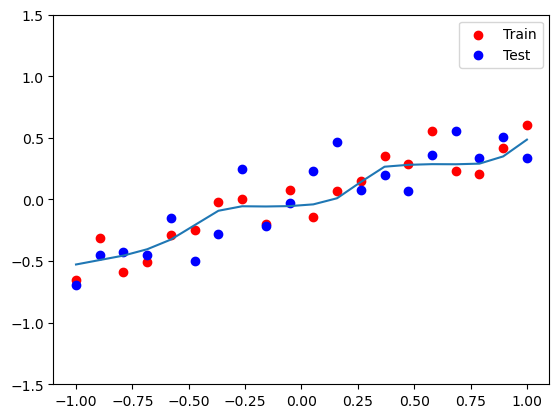

In [47]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()